In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

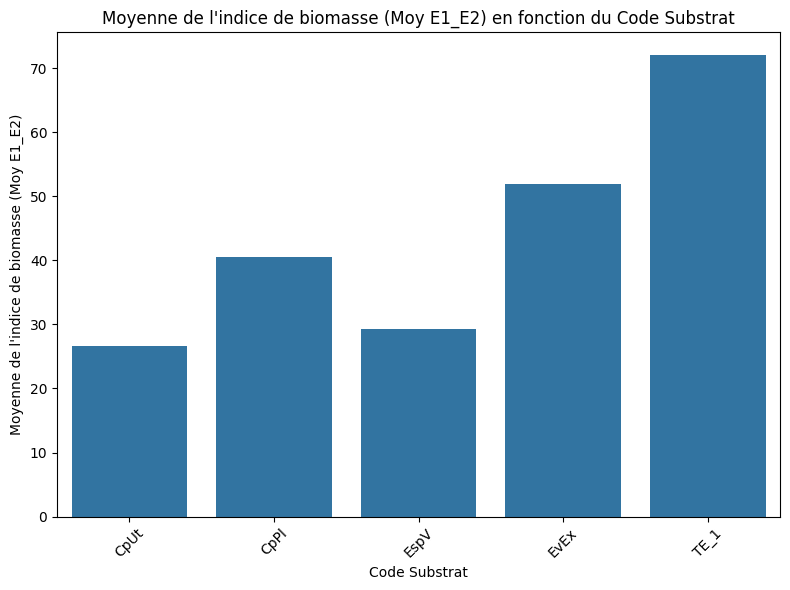

In [7]:
# Exemple de DataFrame avec une colonne 'code echantillon'
data_bmm = pd.read_csv('../Data/BiomasseMoleculaireMicrobienne.csv')
df = pd.DataFrame(data_bmm)

# Création d'une nouvelle colonne avec les 2 premiers caractères inchangés et les 2 suivants en minuscules
df['new_code'] = df['code echantillon'].apply(lambda x: x[:2] + x[2:4].lower() + x[4:])

# Chargement des données
data_bmm = pd.read_csv('../Data/BiomasseMoleculaireMicrobienne.csv')

# Création d'une nouvelle colonne avec les 2 premiers caractères inchangés et les 2 suivants en minuscules
data_bmm['new_code'] = data_bmm['code echantillon'].apply(lambda x: x[:2] + x[2:4].lower() + x[4:])

# Extraction des 4 premiers caractères de la colonne 'code echantillon'
data_bmm['new_code'] = data_bmm['code echantillon'].str[:4]

# Création d'un DataFrame avec les indices de biomasse et les substrats
df = pd.DataFrame({
    'Moy E1_E2': data_bmm['Moy E1_E2'], 
    'Code Substrat': data_bmm['new_code']
})

df_filtered = df[:-1] 
# Création du diagramme en barres avec seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Code Substrat', y='Moy E1_E2', data=df_filtered, errorbar=None)

# Ajout du titre et des labels
plt.title("Moyenne de l'indice de biomasse (Moy E1_E2) en fonction du Code Substrat")
plt.xlabel("Code Substrat")
plt.ylabel("Moyenne de l'indice de biomasse (Moy E1_E2)")

# Affichage du graphique
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe X si nécessaire
plt.tight_layout()
plt.show()

Index(['ordre_extraction', 'ordre_BMM', 'code echantillon', 'BMM µg/g_sol_E1',
       'BMM µg/g_sol_E2', 'Moy E1_E2'],
      dtype='object')


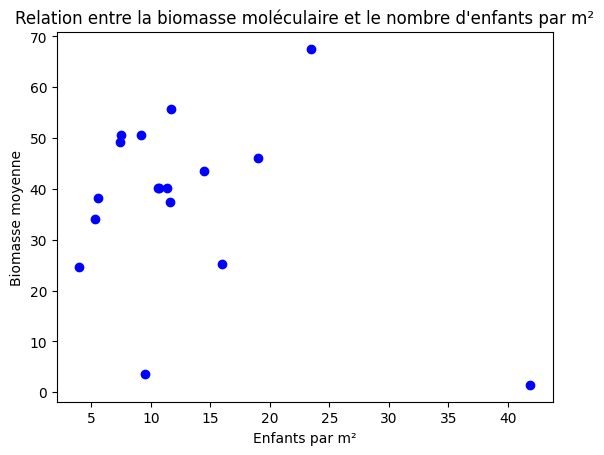

In [5]:
data = pd.read_csv("../Data/TableauxdonnéesParcelle_modifié.csv")
data1 = pd.read_csv("../Data/BiomasseMoleculaireMicrobienne.csv")
print(data1.columns)
df = pd.merge(data, data1, left_on = "Parcelle", right_on = "code echantillon")
df_unique = df.drop_duplicates(subset='Enfantsparm2')

# Exemple de deux variables quantitatives
x = df_unique["Moy E1_E2"]  # Variable quantitative 1
y = df_unique["Enfantsparm2"]  # Variable quantitative 2

# Création du nuage de points
plt.scatter(y, x, color='b')

# Ajout de titres et d'étiquettes
plt.title("Relation entre la biomasse moléculaire et le nombre d'enfants par m²")
plt.ylabel("Biomasse moyenne")
plt.xlabel("Enfants par m²")

# Affichage du graphique
plt.show()

Colonnes de tableau:
['Ecole', 'Age', 'Habitat', 'Parcelle', 'Nb arbres', 'Temps', 'Ganivelles', 'Emplacement', 'Enfantsparm2', 'Surface', ' Argile', 'Limon', 'Sable', ' MO', 'N_Tot', ' Cu', ' Ni', ' Pb', ' Zn', 'Plagiolepis_pygmaea', 'Messor_groupe_ibericus', 'Lasius_groupe_niger', 'Monomorium_monorium', 'Crematogaster_scutellaris', 'Proformica_nasuta', 'Pheidole_pallidula', 'Tetramorium_sp', 'Tapinoma_madeirense', 'Colobopsis_truncata', 'Camponotus_piceus', 'Campanotus_lateralis', 'Messor_barbarus', 'Lasius_lasioides', 'Temnothorax_unifasciatus', 'Tapinoma_glabrella', 'Linepithema_humile', 'Camponotus_fallax', 'Camponotus_aethiops', 'Temnothorax_continentalis', 'Formica_cunicularia', 'Solenopsis_sp', 'Tapinoma_erraticum', 'Tapinoma_groupe_nigerrimum', 'Hypoponera_eduardi', 'Formica_rufibarbis', 'Temnothorax_lichtensteini', 'Temnothorax_recedens', 'Themnothorax_sp', 'Species', 'Nb_AppatsAnt', 'Nb_Appats', 'Activity']

Colonnes de tableau2:
['ordre_extraction', 'ordre_BMM', 'code echan

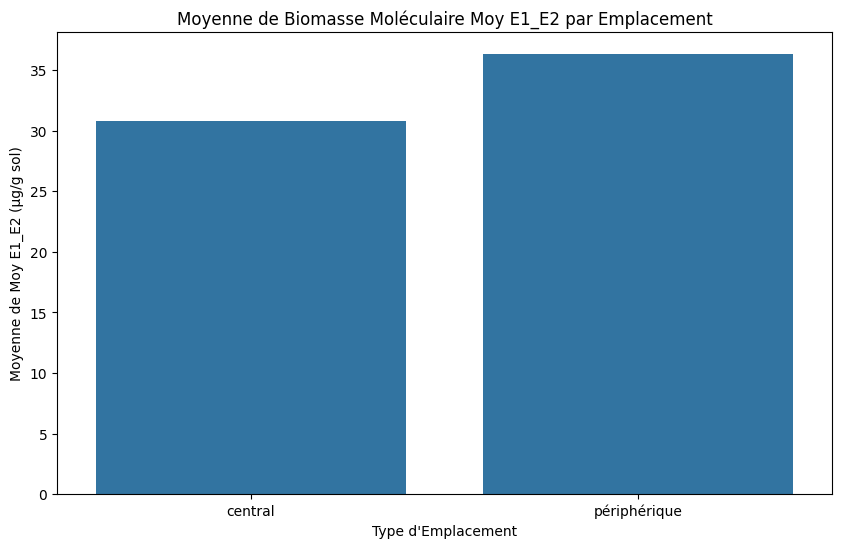

In [8]:
# Charger les données des fichiers CSV
data = pd.read_csv("../Data/TableauxdonnéesParcelle_modifié.csv", sep=",")
data2 = pd.read_csv("../Data/BiomasseMoleculaireMicrobienne.csv", sep=",")

# Créer des DataFrames pour les deux jeux de données
tableau = pd.DataFrame(data)
tableau2 = pd.DataFrame(data2)

# Afficher les colonnes des DataFrames pour vérifier la présence de 'Parcelle'
print("Colonnes de tableau:")
print(tableau.columns.tolist())
print("\nColonnes de tableau2:")
print(tableau2.columns.tolist())

# Supprimer les colonnes indésirables du premier tableau
# (Assurez-vous que cette étape ne modifie pas 'Parcelle')
colonnes_a_supprimer = [
    "Plagiolepis_pygmaea", "Messor_groupe_ibericus", "Lasius_groupe_niger", "Monomorium_monorium", 
    "Crematogaster_scutellaris", "Proformica_nasuta", "Pheidole_pallidula", "Tetramorium_sp", 
    "Tapinoma_madeirense", "Colobopsis_truncata", "Camponotus_piceus", "Campanotus_lateralis", 
    "Messor_barbarus", "Lasius_lasioides", "Temnothorax_unifasciatus", "Tapinoma_glabrella", 
    "Linepithema_humile", "Camponotus_fallax", "Camponotus_aethiops", "Temnothorax_continentalis", 
    "Formica_cunicularia", "Solenopsis_sp", "Tapinoma_erraticum", "Tapinoma_groupe_nigerrimum", 
    "Hypoponera_eduardi", "Formica_rufibarbis", "Temnothorax_lichtensteini", "Temnothorax_recedens", 
    "Themnothorax_sp", "Species", "Nb_AppatsAnt", "Nb_Appats", "Activity"
]
tableau = tableau.drop(columns=colonnes_a_supprimer, errors='ignore')  # ignore errors if column not found

# Fusionner les deux DataFrames sur 'Parcelle' et 'code echantillon'
tableau_fusionne = pd.merge(tableau, tableau2, left_on='Parcelle', right_on='code echantillon', how='inner')

# Ajouter une colonne 'Type_Emplacement' qui indique "central" ou "périphérique"
tableau_fusionne['Type_Emplacement'] = tableau_fusionne['Emplacement'].apply(lambda x: 'central' if x == 0 else 'périphérique')

# Calculer la moyenne de Moy E1_E2 par Type d'Emplacement
moyenne_par_emplacement = tableau_fusionne.groupby('Type_Emplacement')['Moy E1_E2'].mean().reset_index()

# Visualiser les moyennes de Moy E1_E2 dans un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=moyenne_par_emplacement, 
    x='Type_Emplacement', 
    y='Moy E1_E2', 
)

plt.title("Moyenne de Biomasse Moléculaire Moy E1_E2 par Emplacement")
plt.xlabel("Type d'Emplacement")
plt.ylabel("Moyenne de Moy E1_E2 (µg/g sol)")
plt.xticks(rotation=0)  # Optionnel : pour garder les étiquettes horizontales
plt.show()
